In [1]:
import numpy as np
import pandas as pd
import numpy as np
import cv2
from IPython.display import clear_output, Image, display
import matplotlib.pyplot as plt

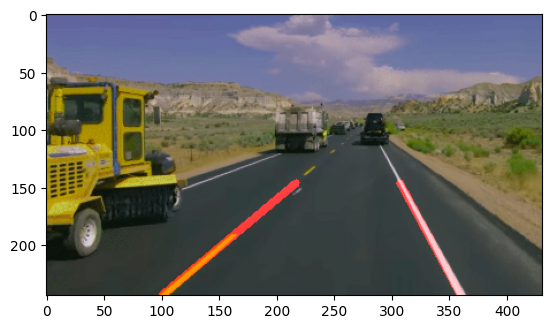

In [11]:
def Canny(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(blur, 50, 150)

    return canny


def region_of_interest(image):
    height = 240
    polygons = np.array([[(55, height), (400, height), (280, 50)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    masked_region = cv2.bitwise_and(image, mask)

    return masked_region


def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 5)
    return line_image


def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)
    return np.array([x1, y1, x2, y2])


def average_slope_intercept(image, lines):
    left_fit = []
    right_fit = []

    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)

        slope = parameters[0]
        intercept = parameters[1]

        if slope < 0:
            left_fit.append((slope, intercept))
        elif slope >= 0:
            right_fit.append((slope, intercept))

    left_fit_average = np.average(left_fit, axis=0)
    right_fit_average = np.average(right_fit, axis=0)

    left_line = make_coordinates(image, left_fit_average)
    right_line = make_coordinates(image, right_fit_average)

    return np.array([left_line, right_line])


# image = cv2.VideoCapture("lane.mp4")
image = cv2.imread("lane.png")
lane_image = np.copy(image)
canny = Canny(lane_image)
canny_image = Canny(lane_image)
cropped_image = region_of_interest(canny_image)

lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines)

combo_image = cv2.addWeighted(lane_image, 1, line_image, 1, 1)
combo_image = cv2.cvtColor(combo_image, cv2.COLOR_RGB2BGR)
plt.imshow(combo_image)
plt.show()


In [ ]:
from google.colab.patches import cv2_imshow
cap = cv2.VideoCapture("lane.gif")

while (cap.isOpened()):
   _, frame = cap.read()
   canny_image = Canny(frame)
   cropped_image = region_of_interest(canny_image)
   lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 100, np.array([]), 40, 5)
  #  averaged_lines = average_slope_intercept(frame, lines)
   line_image = display_lines(frame, lines)
   combo_image = cv2.addWeighted(frame, 1, line_image, 1, 1)
    
   cv2_imshow(combo_image)
   if cv2.waitKey(1) == ord("q"):
       break
cap.release()
cv2.destroyAllWindows()